In [1]:
from skimage import io, img_as_float
import matplotlib.pyplot as plt
import numpy as np
from skimage.restoration import denoise_nl_means, estimate_sigma

(array([1.07805e+05, 8.68400e+03, 3.07600e+03, 3.27800e+03, 1.50200e+03,
        1.68100e+03, 8.70000e+02, 1.05900e+03, 5.80000e+02, 6.92000e+02,
        5.04000e+02, 3.21000e+02, 3.66000e+02, 1.96000e+02, 2.35000e+02,
        1.32000e+02, 2.15000e+02, 1.25000e+02, 1.47000e+02, 9.70000e+01,
        1.31000e+02, 1.21000e+02, 8.40000e+01, 1.28000e+02, 8.20000e+01,
        1.27000e+02, 8.50000e+01, 1.12000e+02, 8.50000e+01, 1.08000e+02,
        8.60000e+01, 7.10000e+01, 8.70000e+01, 7.10000e+01, 8.60000e+01,
        5.20000e+01, 9.10000e+01, 4.50000e+01, 6.00000e+01, 4.00000e+01,
        6.20000e+01, 6.80000e+01, 2.30000e+01, 5.00000e+01, 3.30000e+01,
        2.20000e+01, 2.20000e+01, 3.00000e+01, 2.30000e+01, 2.80000e+01,
        2.40000e+01, 2.40000e+01, 4.00000e+01, 2.60000e+01, 2.60000e+01,
        2.60000e+01, 5.00000e+01, 1.70000e+01, 1.50000e+01, 2.30000e+01,
        5.50000e+01, 3.00000e+01, 3.30000e+01, 3.50000e+01, 1.20000e+01,
        2.50000e+01, 2.10000e+01, 4.30000e+01, 2.20

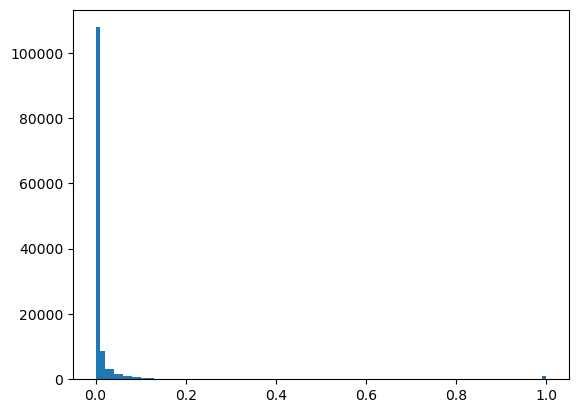

In [2]:
# Histogram
img = img_as_float(io.imread("movies/movie1/1.jpg"))
plt.hist(img.flat, bins=100, range=(0,1))

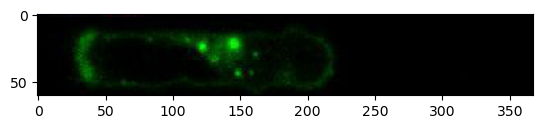

In [3]:
cropped_img = img[30:90, :]
plt.imshow(cropped_img)

In [5]:
# Denoise
sigma_est = np.mean(estimate_sigma(cropped_img, True, channel_axis=-1))
print(f'Estimated noise standard deviation = {sigma_est}')

Estimated noise standard deviation = 0.0017163631632098476


In [9]:
patch_kw = dict(patch_size=5, patch_distance=6)
denoised_img = denoise_nl_means(cropped_img, h=1.15*sigma_est, fast_mode=True, **patch_kw)

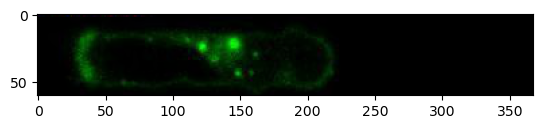

In [10]:
plt.imshow(denoised_img)